# 1. Set up

In [2]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torchvision.models import vit_l_16, ViT_L_16_Weights, resnet50, ResNet50_Weights
from torchvision.datasets import CIFAR10,ImageFolder
from torch.utils.data import DataLoader
import loralib

import torch.optim as optim
from torchvision import datasets
import timm
import matplotlib.pyplot as plt


/home/user/miniconda3/envs/skin_cancer/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [13]:
transform = transforms.Compose([
    transforms.Resize((512, 512)),  # Resize images to fit ViT's input size
    
    # transforms.Resize((224, 224)),  # Resize images to fit ViT's input size
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),  # Normalize with ImageNet stats
])

In [14]:
class CustomDataset(ImageFolder):
    def __init__(self, root_dir, transform=None):
        super(CustomDataset, self).__init__(root=root_dir, transform=transform)

In [15]:
train_data_path = "../data/ISIC2018/Image" 
val_data_path = "../val_data_new/ISIC2018/Image"

In [16]:
train_dataset = CustomDataset(root_dir = train_data_path, transform=transform)
val_dataset = CustomDataset(root_dir = val_data_path, transform=transform)

In [17]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=8, shuffle=False)

# 2. Define model

In [18]:
class ViTClassifier(nn.Module):
    def __init__(self, num_classes=7):
        super(ViTClassifier, self).__init__()
        self.vit = vit_l_16(weights=ViT_L_16_Weights.IMAGENET1K_SWAG_E2E_V1)
        # self.vit = resnet50(weights=ResNet50_Weights.IMAGENET1K_V2)
        self.fc = nn.Sequential(
            loralib.Linear(1024,512,r=16),
            nn.ReLU(),
            nn.Linear(512,128),
            nn.ReLU(),
            nn.Linear(128,num_classes)
        )
        # self.fc = nn.Linear(self.vit.fc.in_features, num_classes)
        
        # self.vit.heads = self.fc # Replace the pre-trained head

    def forward(self, x):
        return self.vit(x)

model = ViTClassifier()

# 3. Loss and Optim

In [31]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loralib.mark_only_lora_as_trainable(model)
# 4. Training loop
num_epochs = 10
for epoch in range(num_epochs):
    for images, labels in train_loader:
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

print("Training complete!")

Epoch [1/10], Loss: 0.7288
Epoch [2/10], Loss: 1.0175
Epoch [3/10], Loss: 0.8150
Epoch [4/10], Loss: 0.6654
Epoch [5/10], Loss: 0.5728
Epoch [6/10], Loss: 0.7196
Epoch [7/10], Loss: 0.3683
Epoch [8/10], Loss: 0.4870
Epoch [9/10], Loss: 0.6087
Epoch [10/10], Loss: 0.5637
Training complete!


In [19]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

ViTClassifier(
  (vit): VisionTransformer(
    (conv_proj): Conv2d(3, 1024, kernel_size=(16, 16), stride=(16, 16))
    (encoder): Encoder(
      (dropout): Dropout(p=0.0, inplace=False)
      (layers): Sequential(
        (encoder_layer_0): EncoderBlock(
          (ln_1): LayerNorm((1024,), eps=1e-06, elementwise_affine=True)
          (self_attention): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=1024, out_features=1024, bias=True)
          )
          (dropout): Dropout(p=0.0, inplace=False)
          (ln_2): LayerNorm((1024,), eps=1e-06, elementwise_affine=True)
          (mlp): MLPBlock(
            (0): Linear(in_features=1024, out_features=4096, bias=True)
            (1): GELU(approximate='none')
            (2): Dropout(p=0.0, inplace=False)
            (3): Linear(in_features=4096, out_features=1024, bias=True)
            (4): Dropout(p=0.0, inplace=False)
          )
        )
        (encoder_layer_1): EncoderBlock(
          (ln_

In [20]:
device

device(type='cuda')

Epoch [1/100] Train Loss: 5.7000 Train Acc: 3.34% Val Loss: 6.0170 Val Acc: 2.45%
Epoch [2/100] Train Loss: 5.7000 Train Acc: 3.34% Val Loss: 6.0170 Val Acc: 2.45%
Epoch [3/100] Train Loss: 5.7000 Train Acc: 3.34% Val Loss: 6.0170 Val Acc: 2.45%
Epoch [4/100] Train Loss: 5.7000 Train Acc: 3.34% Val Loss: 6.0170 Val Acc: 2.45%
Epoch [5/100] Train Loss: 5.7000 Train Acc: 3.34% Val Loss: 6.0170 Val Acc: 2.45%
Epoch [6/100] Train Loss: 5.7001 Train Acc: 3.34% Val Loss: 6.0170 Val Acc: 2.45%
Epoch [7/100] Train Loss: 5.7000 Train Acc: 3.34% Val Loss: 6.0170 Val Acc: 2.45%
Epoch [8/100] Train Loss: 5.7000 Train Acc: 3.34% Val Loss: 6.0170 Val Acc: 2.45%
Epoch [9/100] Train Loss: 5.7000 Train Acc: 3.34% Val Loss: 6.0170 Val Acc: 2.45%
Epoch [10/100] Train Loss: 5.7000 Train Acc: 3.34% Val Loss: 6.0170 Val Acc: 2.45%
Epoch [11/100] Train Loss: 5.7000 Train Acc: 3.34% Val Loss: 6.0170 Val Acc: 2.45%
Epoch [12/100] Train Loss: 5.7000 Train Acc: 3.34% Val Loss: 6.0170 Val Acc: 2.45%
Epoch [13/100

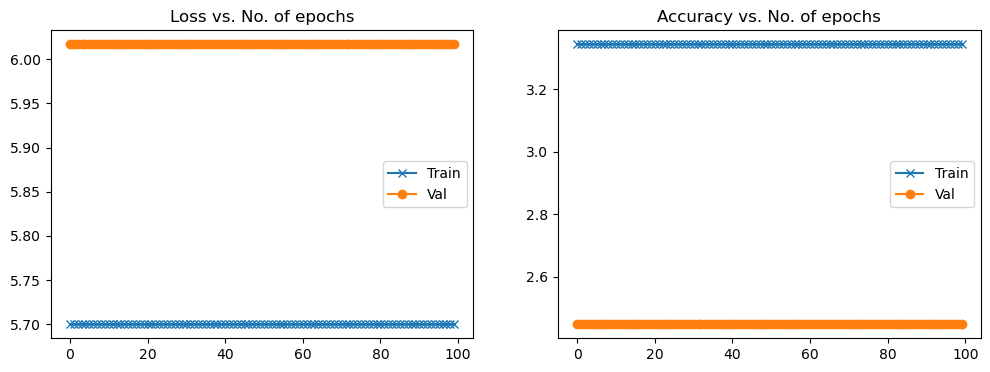

In [22]:
# Loss & Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)
loralib.mark_only_lora_as_trainable(model)

# Training loop
num_epochs = 100
train_losses, val_losses, train_accuracies, val_accuracies = [], [], [], []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = model(images)
        loss = criterion(outputs, labels)
        # loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

    scheduler.step()

    train_loss = running_loss / len(train_loader)
    train_acc = 100. * correct / total

    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)

            val_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

    val_loss = val_loss / len(val_loader)
    val_acc = 100. * correct / total

    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)

    print(f"Epoch [{epoch + 1}/{num_epochs}] Train Loss: {train_loss:.4f} Train Acc: {train_acc:.2f}% Val Loss: {val_loss:.4f} Val Acc: {val_acc:.2f}%")

# Plotting Training & Validation Loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_losses, '-x', label='Train')
plt.plot(val_losses, '-o', label='Val')
plt.title('Loss vs. No. of epochs')
plt.legend()

# Plotting Training & Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, '-x', label='Train')
plt.plot(val_accuracies, '-o', label='Val')
plt.title('Accuracy vs. No. of epochs')
plt.legend()
plt.show()

# 5. Save model

In [36]:
torch.save(model.state_dict(), 'simple_Vit_22102023.pth')

# 6. Load and eval

In [8]:
load_model = ViTClassifier()
load_model.load_state_dict(torch.load('simple_Vit.pth'))
load_model.eval()

ViTClassifier(
  (vit): VisionTransformer(
    (conv_proj): Conv2d(3, 1024, kernel_size=(16, 16), stride=(16, 16))
    (encoder): Encoder(
      (dropout): Dropout(p=0.0, inplace=False)
      (layers): Sequential(
        (encoder_layer_0): EncoderBlock(
          (ln_1): LayerNorm((1024,), eps=1e-06, elementwise_affine=True)
          (self_attention): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=1024, out_features=1024, bias=True)
          )
          (dropout): Dropout(p=0.0, inplace=False)
          (ln_2): LayerNorm((1024,), eps=1e-06, elementwise_affine=True)
          (mlp): MLPBlock(
            (0): Linear(in_features=1024, out_features=4096, bias=True)
            (1): GELU(approximate='none')
            (2): Dropout(p=0.0, inplace=False)
            (3): Linear(in_features=4096, out_features=1024, bias=True)
            (4): Dropout(p=0.0, inplace=False)
          )
        )
        (encoder_layer_1): EncoderBlock(
          (ln_

# 7. Testing 

In [16]:
test_path = '../test_data/ISIC2018/Image'
test_dataset = CustomDataset(root_dir = test_path, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)
# classes = ["MEL", "NV", "BCC", "AKIEC", "BKL", "DF", "VASC"]
classes = ["AKIEC", "BCC", "BKL", "DF", "MEL", "NV", "VASC"]

correct = 0
total = 0

In [17]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = load_model(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):  # Adjust based on your batch size
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

In [18]:
class_total

[4.0, 0.0, 0.0, 0.0, 3.0, 1.0, 0.0, 0.0, 0.0, 0.0]

In [19]:
import matplotlib.pyplot as plt

class_accuracy = [100 * class_correct[i] / class_total[i] for i in range(10)]

plt.figure(figsize=(12, 8))
plt.bar(classes, class_accuracy)
plt.xlabel('Classes')
plt.ylabel('Accuracy (%)')
plt.title('Class-wise Accuracy')
plt.xticks(classes, rotation=45)
plt.ylim(0, 100)  # Set y-axis limits to 0-100 for percentage
plt.tight_layout()
plt.show()

ZeroDivisionError: float division by zero

In [11]:
classes = ["MEL", "NV", "BCC", "AKIEC", "BKL", "DF", "VASC"]
correct = 0
total = 0
with torch.no_grad():  # Don't track gradients
    for data in test_loader:
        images, labels = data
        outputs = load_model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the model on the test images: {100 * correct / total}%')
# for images, labels in test_loader:
#     outputs = load_model(images)
#     _, predicted = torch.max(outputs, 1)
#     print('Predicted:', ' '.join('%5s' % classes[predicted[j]] for j in range(4)))

Accuracy of the model on the 10000 test images: 45.5026455026455%


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


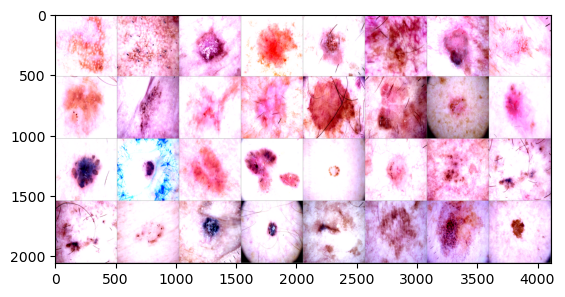

GroundTruth:    MEL   MEL   MEL   MEL


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Function to show an image
def imshow(img):
    img = img / 2 + 0.5     # Unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Get some random test images
dataiter = iter(test_loader)
images, labels = next(dataiter)

# Show images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

# Predict with the model
outputs = load_model(images)
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]] for j in range(4)))

In [ ]:
# Data Loaders
transform = transforms.Compose([
    transforms.Resize(224),
    transforms.ToTensor(),
])

train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)

val_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=64, shuffle=False)

# Model
model = timm.create_model("vit_base_patch16_224", pretrained=True, num_classes=10)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Loss & Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)

# Training loop
num_epochs = 4
train_losses, val_losses, train_accuracies, val_accuracies = [], [], [], []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

    scheduler.step()

    train_loss = running_loss / len(train_loader)
    train_acc = 100. * correct / total

    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)

            val_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

    val_loss = val_loss / len(val_loader)
    val_acc = 100. * correct / total

    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)

    print(f"Epoch [{epoch + 1}/{num_epochs}] Train Loss: {train_loss:.4f} Train Acc: {train_acc:.2f}% Val Loss: {val_loss:.4f} Val Acc: {val_acc:.2f}%")

# Plotting Training & Validation Loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_losses, '-x', label='Train')
plt.plot(val_losses, '-o', label='Val')
plt.title('Loss vs. No. of epochs')
plt.legend()

# Plotting Training & Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, '-x', label='Train')
plt.plot(val_accuracies, '-o', label='Val')
plt.title('Accuracy vs. No. of epochs')
plt.legend()
plt.show()
